In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


YOLOV5S

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-247-gcf298fb Python-3.7.13 torch-1.11.0+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.4/107.7 GB disk)


In [ ]:
!git clone https://github.com/roboflow-ai/yolov5 # clone repo 
!pip install -U -r yolov5/requirements.txt #install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 10239, done.
remote: Total 10239 (delta 0), reused 0 (delta 0), pack-reused 10239
Receiving objects: 100% (10239/10239), 10.57 MiB | 20.70 MiB/s, done.
Resolving deltas: 100% (7046/7046), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 21.7 MB/s 
     |████████████████████████████████| 60.9 MB 101 kB/s 
     |████████████████████████████████| 3.1 MB 60.5 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 5.8 MB 38.8 MB/s 
     |████████████████████████████████| 930 kB 58.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Unin

In [ ]:
# import requirements
import torch

from IPython.display import Image, clear_output  # to display images
#from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.11.0+cu113 CPU


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python detect.py --weights '/content/gdrive/MyDrive/Marine Litter Detection/best.pt' --img 416 --conf 0.4 --source /content/gdrive/MyDrive/small_test_folder

----------------

In [ ]:
import cv2
import glob

images = [cv2.imread(file) for file in glob.glob('/content/gdrive/MyDrive/small_test_folder/*.jpg')]

Get datframe for predictions

In [ ]:
import cv2
import torch
import glob
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/gdrive/MyDrive/Marine Litter Detection/best.pt')  # custom trained model

# Images
images = [cv2.imread(file) for file in glob.glob('/content/gdrive/MyDrive/small_test_folder/*.jpg')]

# Inference
results = model(images, size=416)  # includes NMS

# Results
results.print()  
#results.save()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7303155 parameters, 0 gradients, 16.9 GFLOPs
Adding AutoShape... 


image 1/25: 360x480 1 trash_unknown_instance
image 2/25: 360x480 1 trash_unknown_instance
image 3/25: 360x480 1 rov
image 4/25: 360x480 (no detections)
image 5/25: 360x480 1 trash_unknown_instance
image 6/25: 360x480 1 animal_fish
image 7/25: 360x480 (no detections)
image 8/25: 270x480 1 animal_fish, 1 trash_branch, 1 trash_unknown_instance
image 9/25: 360x480 1 trash_unknown_instance
image 10/25: 270x480 1 rov
image 11/25: 360x480 (no detections)
image 12/25: 360x480 (no detections)
image 13/25: 360x480 1 animal_etc, 1 animal_fish, 1 animal_shells
image 14/25: 360x480 1 animal_fish, 1 trash_unknown_instance
image 15/25: 360x480 (no detections)
image 16/25: 360x480 1 trash_unknown_instance
image 17/25: 360x480 (no detections)
image 18/25: 270x480 1 trash_branch
image 19/25: 360x480 1 trash_unknown_instance
image 20/25: 270x480 1 trash_unknown_instance
image 21/25: 360x480 (no detections)
image 22/25: 360x480 1 animal_fish, 2 trash_unknown_instances
image 23/25: 360x480 (no detections)


,xmin,ymin,xmax,ymax,confidence,class,name
0,343.157715,259.463379,416.752167,312.721008,0.344981,20,trash_unknown_instance


In [ ]:
# Results
#results.print()  
#results.save()  # or .show()

#results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)

,xmin,ymin,xmax,ymax,confidence,class,name
0,343.157715,259.463379,416.752167,312.721008,0.344981,20,trash_unknown_instance


In [ ]:
import pandas as pd

In [ ]:
predicts= pd.DataFrame()
for i in range(0,24):
  predicts= predicts.append((results.pandas().xyxy[i]),ignore_index=True)

In [ ]:
from IPython.display import display
display(predicts)

,xmin,ymin,xmax,ymax,confidence,class,name
0,343.157715,259.463379,416.752167,312.721008,0.344981,20,trash_unknown_instance
1,127.501259,214.682373,251.133194,280.525848,0.491094,20,trash_unknown_instance
2,396.309814,305.743500,474.134064,359.095978,0.614506,7,rov
3,116.000656,65.439415,414.507812,242.361801,0.560939,20,trash_unknown_instance
4,185.282303,104.131447,342.658478,286.798737,0.920102,3,animal_fish
5,363.865234,89.511726,455.133331,174.959549,0.308003,10,trash_branch
6,365.310760,89.945122,454.130219,174.911652,0.282846,20,trash_unknown_instance
7,364.585297,89.841377,454.386078,174.587723,0.250074,3,animal_fish
8,150.019226,76.142685,475.014587,360.000000,0.875280,20,trash_unknown_instance
9,90.290306,51.538372,145.257462,267.571899,0.596795,7,rov


------------------------------------------------

In [ ]:
results = model(images)  # inference
results.pandas().xyxy[0].sort_values('xmin') 

In [ ]:

# Model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, etc.
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/gdrive/MyDrive/Marine Litter Detection/best.pt')  # custom trained model

# Images
#im = glob('')  # or file, Path, URL, PIL, OpenCV, numpy, list

# Inference
results = model(images)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

results.xyxy[0]  # im predictions (tensor)
results.pandas().xyxy[0]  # im predictions (pandas)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-233-g7433d38 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7303155 parameters, 0 gradients, 16.9 GFLOPs
Adding AutoShape... 


image 1/25: 360x480 1 animal_eel, 2 animal_fishs, 1 animal_starfish
image 2/25: 360x480 (no detections)
image 3/25: 360x480 1 rov
image 4/25: 360x480 (no detections)
image 5/25: 360x480 1 trash_unknown_instance
image 6/25: 360x480 1 animal_fish
image 7/25: 360x480 (no detections)
image 8/25: 270x480 1 trash_branch
image 9/25: 360x480 2 trash_unknown_instances
image 10/25: 270x480 1 rov
image 11/25: 360x480 1 animal_fish
image 12/25: 360x480 (no detections)
image 13/25: 360x480 2 animal_etcs, 1 animal_fish, 1 animal_shells
image 14/25: 360x480 1 animal_fish, 1 trash_unknown_instance
image 15/25: 360x480 1 trash_unknown_instance
image 16/25: 360x480 1 trash_unknown_instance
image 17/25: 360x480 1 animal_fish
image 18/25: 270x480 2 trash_branchs, 1 trash_unknown_instance
image 19/25: 360x480 1 trash_unknown_instance
image 20/25: 270x480 1 animal_fish
image 21/25: 360x480 1 trash_unknown_instance
image 22/25: 360x480 1 animal_fish, 2 trash_unknown_instances
image 23/25: 360x480 (no detecti

,xmin,ymin,xmax,ymax,confidence,class,name
0,409.884766,226.558228,455.511780,251.186966,0.662628,1,animal_eel
1,344.752319,262.841919,416.060120,315.299713,0.638209,5,animal_starfish
2,340.744171,325.715759,363.577209,344.117676,0.628567,3,animal_fish
3,263.244995,277.633057,304.650543,307.651459,0.453366,3,animal_fish


-----------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
disp_images = glob.glob('/content/yolov5/runs/detect/exp4/*.jpg')
fig=plt.figure(figsize=(20, 28))
columns = 3
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.choice(disp_images)
    img = plt.imread(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

AttributeError: ignored

In [ ]:
!python detect.py --source /content/gdrive/MyDrive/several.mp4 --weights /content/gdrive/MyDrive/best.pt

/content/yolov5
detect: weights=['/content/gdrive/MyDrive/best.pt'], source=/content/gdrive/MyDrive/several.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-151-gabbdd48 torch 1.11.0+cu113 CPU

Fusing layers... 
Model Summary: 232 layers, 7303155 parameters, 0 gradients, 16.9 GFLOPs
video 1/1 (1/1131) /content/gdrive/MyDrive/several.mp4: 480x640 1 trash_unknown_instance, Done. (0.448s)
video 1/1 (2/1131) /content/gdrive/MyDrive/several.mp4: 480x640 1 trash_unknown_instance, Done. (0.336s)
video 1/1 (3/1131) /content/gdrive/MyDrive/several.mp4: 480x640 1 trash_unknown_instance, Done. (0.343s)
video 1/1 (4/1131) /content/gdrive/MyDrive/several.mp4: 480x640 1 trash_un

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/yolov5/runs/detect/exp/several.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

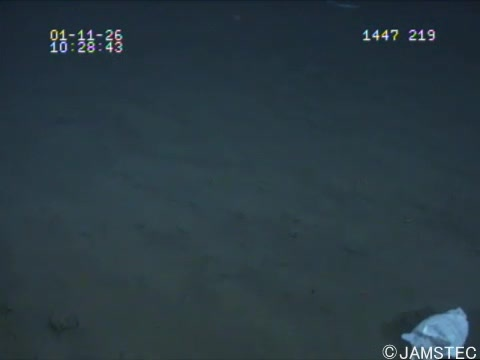

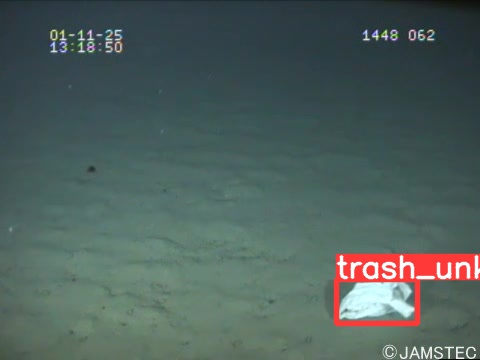

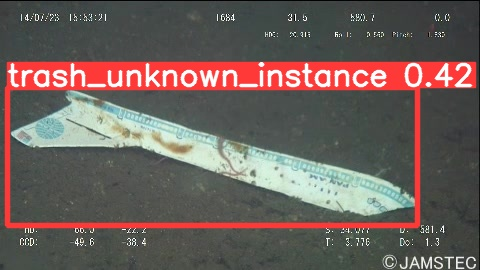

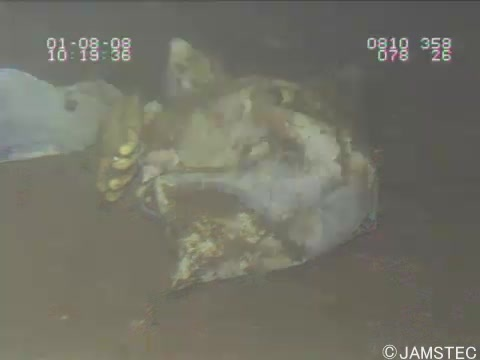

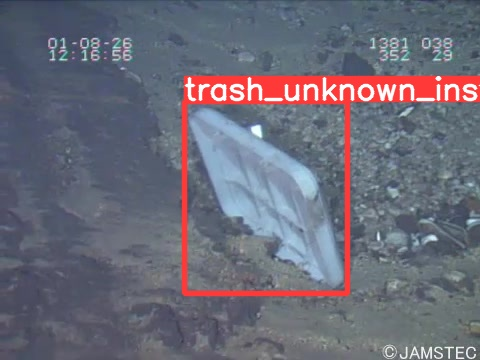

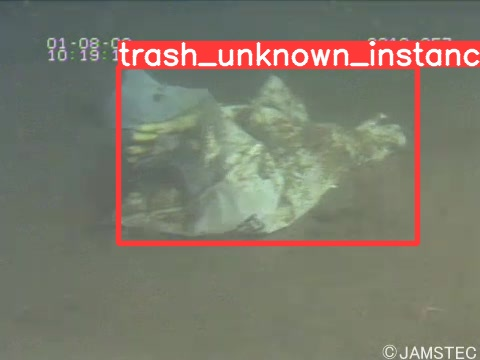

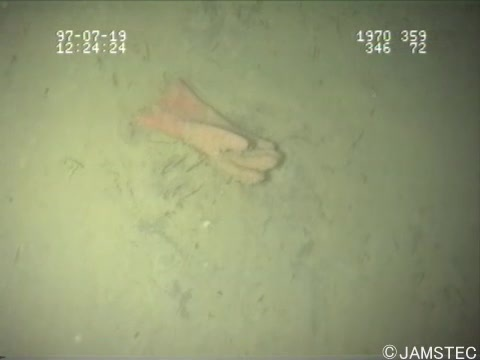

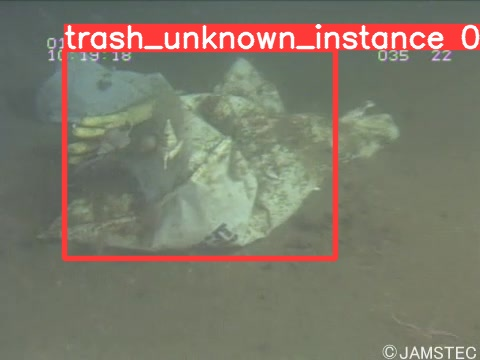

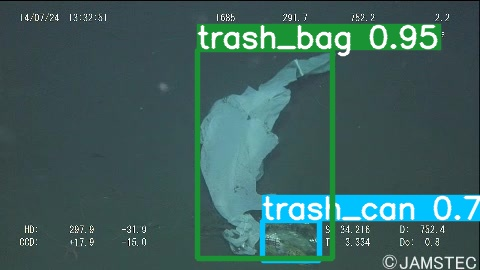

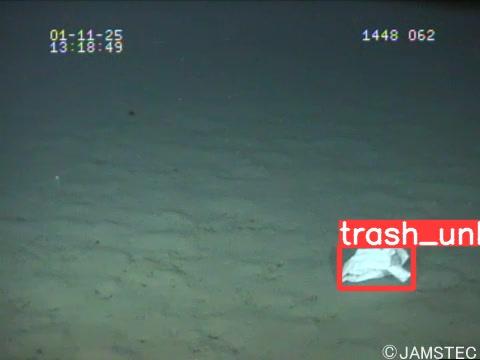

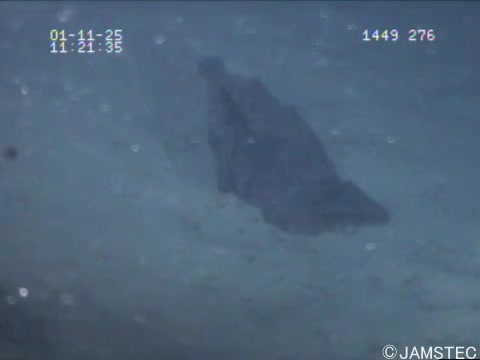

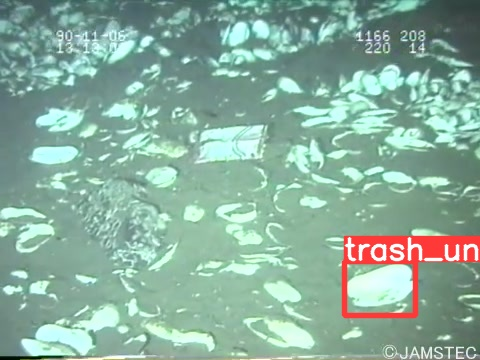

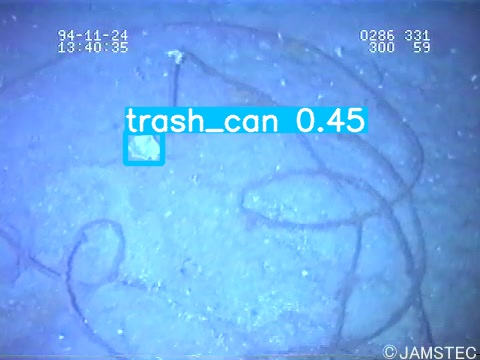

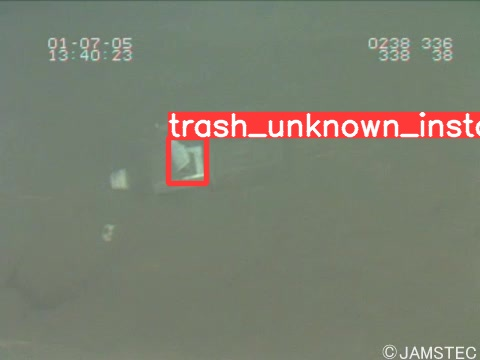

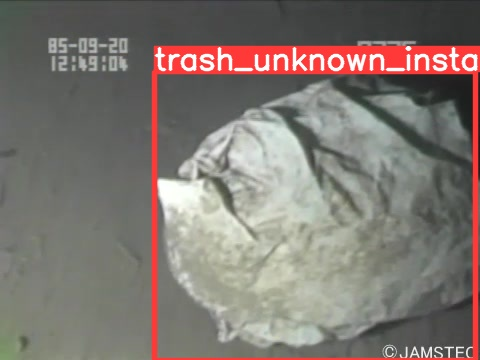

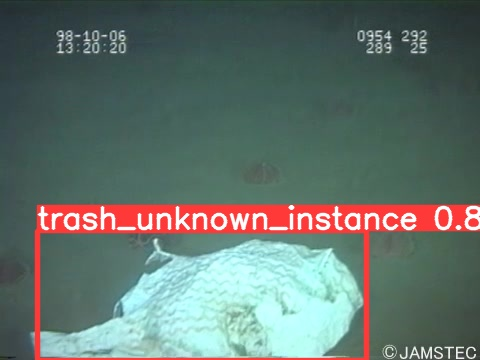

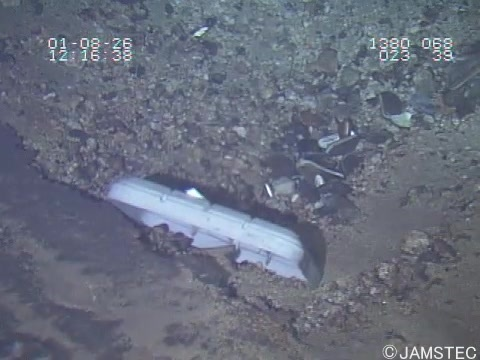

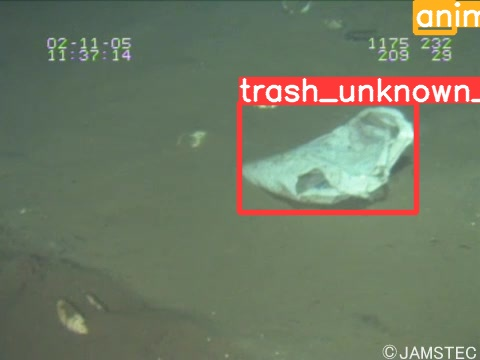

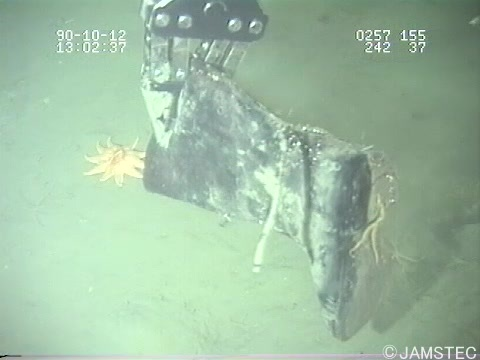

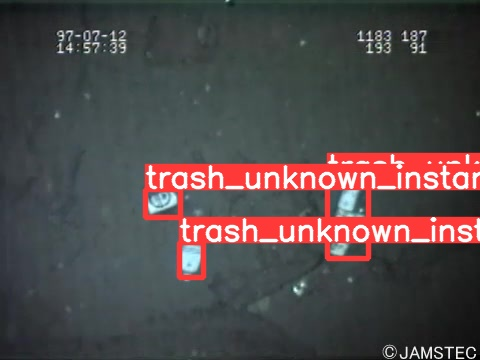

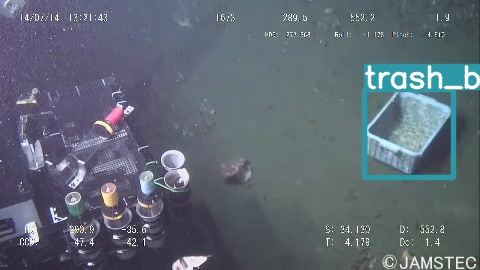

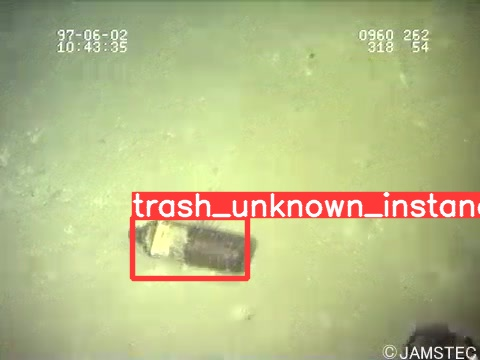

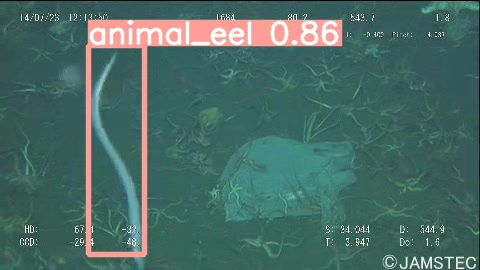

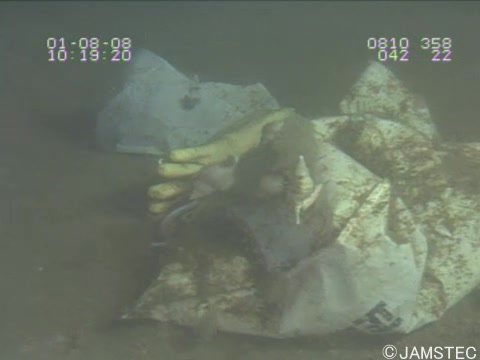

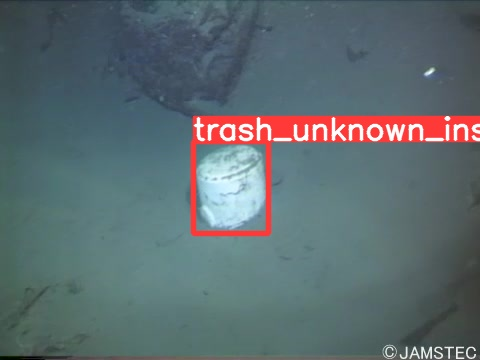

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

Count

### **Using detectron2**

In [ ]:
!python -m pip install pyyaml==5.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 15.1 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=e82940a0e2fbe494d434b542827e433dc87f50af231e120bb18e2f72af37ad12
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-1g8du0ex
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-1g8du0ex
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 79 kB

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
torch:  1.11 ; cuda:  cu113
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))      # use pretrained weights
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = os.path.join("/content/drive/MyDrive/", "model_final.pth")
predictor = DefaultPredictor(cfg)

WARNING [06/21 07:02:23 d2.checkpoint.c2_model_loading]: Shape of backbone.bottom_up.res2.0.conv1.norm.bias in checkpoint is torch.Size([256]), while shape of backbone.bottom_up.res2.0.conv1.norm.bias in model is torch.Size([64]).
WARNING [06/21 07:02:23 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.conv1.norm.bias will not be loaded. Please double check and see if this is desired.
WARNING [06/21 07:02:23 d2.checkpoint.c2_model_loading]: Shape of backbone.bottom_up.res2.0.conv1.norm.running_mean in checkpoint is torch.Size([256]), while shape of backbone.bottom_up.res2.0.conv1.norm.running_mean in model is torch.Size([64]).
WARNING [06/21 07:02:23 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.conv1.norm.running_mean will not be loaded. Please double check and see if this is desired.
WARNING [06/21 07:02:23 d2.checkpoint.c2_model_loading]: Shape of backbone.bottom_up.res2.0.conv1.norm.running_var in checkpoint is torch.Size([256]), while shape of backbone.botto

Skip loading parameter 'backbone.bottom_up.res2.0.conv1.norm.bias' to the model due to incompatible shapes: (256,) in the checkpoint but (64,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res2.0.conv1.norm.running_mean' to the model due to incompatible shapes: (256,) in the checkpoint but (64,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res2.0.conv1.norm.running_var' to the model due to incompatible shapes: (256,) in the checkpoint but (64,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res2.0.conv1.norm.weight' to the model due to incompatible shapes: (256,) in the checkpoint but (64,) in the model! You might want to double check if this is expected.
Skip loading parameter 'backbone.bottom_up.res2.0.conv1.weight' to the model due to incompatible shapes: (256, 64, 1, 1) in the checkpoint but (64,

On small test set

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/gdrive/MyDrive/small_test_folder/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                scale=1.2
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
!curl -L "https://app.roboflow.com/ds/tuvr6lYAFo?key=1ZKjiU5nok" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/vid_000131_frame0000027_jpg.rf.b44d1e0fabe9cdca6cefd01819391ea3.jpg  
 extracting: train/vid_000132_frame0000001_jpg.rf.e358faeefa7529accd9b9e9b4e6c4b52.jpg  
 extracting: train/vid_000132_frame0000003_jpg.rf.76582eee3eb567b037713399ae0a3e74.jpg  
 extracting: train/vid_000132_frame0000004_jpg.rf.6f724f09e2f10ce947078635dd97ed3d.jpg  
 extracting: train/vid_000132_frame0000005_jpg.rf.41ba2e6c9a1fc99f47b19b665ffafbc9.jpg  
 extracting: train/vid_000132_frame0000006_jpg.rf.0044f0b4250a69f13e135700b7a67bff.jpg  
 extracting: train/vid_000132_frame0000008_jpg.rf.bb94ed863d079dab567e13ea00b7f9f4.jpg  
 extracting: train/vid_000132_frame0000009_jpg.rf.f525486ac2e0449844bda35d25bacf72.jpg  
 extracting: train/vid_000132_frame0000010_jpg.rf.90651d8be1f4a9f74c4e295dad7bdc99.jpg  
 extracting: train/vid_000132_frame0000011_jpg.rf.c719a272744021c254047572c6f1d879.jpg  
 extracting: train/vid_000132_frame0000012_jpg.rf.1935f7f4a

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# import some common libraries
import numpy as np
import tqdm
import cv2
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.video_visualizer import VideoVisualizer
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
import time

# Extract video properties
video = cv2.VideoCapture('/content/drive/MyDrive/several.mp4')
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_per_second = video.get(cv2.CAP_PROP_FPS)
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize video writer
video_writer = cv2.VideoWriter('/content/drive/MyDrive/several_out_maskrcnn.mp4', fourcc=cv2.VideoWriter_fourcc(*"mp4v"), fps=float(frames_per_second), frameSize=(width, height), isColor=True)

# Initialize predictor
cfg = get_cfg()

#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = os.path.join("/content/drive/MyDrive/Models/output/", "model_final.pth")
predictor = DefaultPredictor(cfg)

# Initialize visualizer
v = VideoVisualizer(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), ColorMode.IMAGE)

def runOnVideo(video, maxFrames):
    """ Runs the predictor on every frame in the video (unless maxFrames is given),
    and returns the frame with the predictions drawn.
    """

    readFrames = 0
    while True:
        hasFrame, frame = video.read()
        if not hasFrame:
            break

        # Get prediction results for this frame
        outputs = predictor(frame)

        # Make sure the frame is colored
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Draw a visualization of the predictions using the video visualizer
        visualization = v.draw_instance_predictions(frame, outputs["instances"].to("cpu"))

        # Convert Matplotlib RGB format to OpenCV BGR format
        visualization = cv2.cvtColor(visualization.get_image(), cv2.COLOR_RGB2BGR)

        yield visualization

        readFrames += 1
        if readFrames > maxFrames:
            break

# Create a cut-off for debugging
num_frames = 120

# Enumerate the frames of the video
for visualization in tqdm.tqdm(runOnVideo(video, num_frames), total=num_frames):

    # Write test image
    cv2.imwrite('Trash detectron2.png', visualization)

    # Write to video file
    video_writer.write(visualization)

# Release resources
video.release()
video_writer.release()
cv2.destroyAllWindows()

WARNING [05/28 15:08:48 d2.checkpoint.c2_model_loading]: Shape of proposal_generator.rpn_head.anchor_deltas.bias in checkpoint is torch.Size([12]), while shape of proposal_generator.rpn_head.anchor_deltas.bias in model is torch.Size([60]).
WARNING [05/28 15:08:48 d2.checkpoint.c2_model_loading]: proposal_generator.rpn_head.anchor_deltas.bias will not be loaded. Please double check and see if this is desired.
WARNING [05/28 15:08:48 d2.checkpoint.c2_model_loading]: Shape of proposal_generator.rpn_head.anchor_deltas.weight in checkpoint is torch.Size([12, 256, 1, 1]), while shape of proposal_generator.rpn_head.anchor_deltas.weight in model is torch.Size([60, 1024, 1, 1]).
WARNING [05/28 15:08:48 d2.checkpoint.c2_model_loading]: proposal_generator.rpn_head.anchor_deltas.weight will not be loaded. Please double check and see if this is desired.
WARNING [05/28 15:08:48 d2.checkpoint.c2_model_loading]: Shape of proposal_generator.rpn_head.conv.bias in checkpoint is torch.Size([256]), while s

Skip loading parameter 'proposal_generator.rpn_head.conv.weight' to the model due to incompatible shapes: (256, 256, 3, 3) in the checkpoint but (1024, 1024, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.conv.bias' to the model due to incompatible shapes: (256,) in the checkpoint but (1024,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.weight' to the model due to incompatible shapes: (3, 256, 1, 1) in the checkpoint but (15, 1024, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.bias' to the model due to incompatible shapes: (3,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.anchor_deltas.weight' to the model due to incompatible s

IndexError: ignored

In [ ]:
import argparse
import glob
import multiprocessing as mp
import numpy as np
import os
import tempfile
import time
import warnings
import cv2
import tqdm

from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.utils.logger import setup_logger

from predictor import VisualizationDemo


ModuleNotFoundError: ignored

In [ ]:
def test_opencv_video_format(codec, file_ext):
    with tempfile.TemporaryDirectory(prefix="video_format_test") as dir:
        filename = os.path.join(dir, "test_file" + file_ext)
        writer = cv2.VideoWriter(
            filename=filename,
            fourcc=cv2.VideoWriter_fourcc(*codec),
            fps=float(30),
            frameSize=(10, 10),
            isColor=True,
        )
        [writer.write(np.zeros((10, 10, 3), np.uint8)) for _ in range(30)]
        writer.release()
        if os.path.isfile(filename):
            return True
        return False


if _name_ == "_main_":
    mp.set_start_method("spawn", force=True)
    args = get_parser().parse_args()
    setup_logger(name="fvcore")
    logger = setup_logger()
    logger.info("Arguments: " + str(args))

    cfg = setup_cfg(args)

    demo = VisualizationDemo(cfg)

    if args.input:
        if len(args.input) == 1:
            args.input = glob.glob(os.path.expanduser(args.input[0]))
            assert args.input, "The input path(s) was not found"
        for path in tqdm.tqdm(args.input, disable=not args.output):
            # use PIL, to be consistent with evaluation
            img = read_image(path, format="BGR")
            start_time = time.time()
            predictions, visualized_output = demo.run_on_image(img)
            logger.info(
                "{}: {} in {:.2f}s".format(
                    path,
                    "detected {} instances".format(len(predictions["instances"]))
                    if "instances" in predictions
                    else "finished",
                    time.time() - start_time,
                )
            )

            if args.output:
                if os.path.isdir(args.output):
                    assert os.path.isdir(args.output), args.output
                    out_filename = os.path.join(args.output, os.path.basename(path))
                else:
                    assert len(args.input) == 1, "Please specify a directory with args.output"
                    out_filename = args.output
                visualized_output.save(out_filename)
            else:
                cv2.namedWindow(WINDOW_NAME, cv2.WINDOW_NORMAL)
                cv2.imshow(WINDOW_NAME, visualized_output.get_image()[:, :, ::-1])
                if cv2.waitKey(0) == 27:
                    break  # esc to quit
    elif args.webcam:
        assert args.input is None, "Cannot have both --input and --webcam!"
        assert args.output is None, "output not yet supported with --webcam!"
        cam = cv2.VideoCapture(0)
        for vis in tqdm.tqdm(demo.run_on_video(cam)):
            cv2.namedWindow(WINDOW_NAME, cv2.WINDOW_NORMAL)
            cv2.imshow(WINDOW_NAME, vis)
            if cv2.waitKey(1) == 27:
                break  # esc to quit
        cam.release()
        cv2.destroyAllWindows()
    elif args.video_input:
        video = cv2.VideoCapture(args.video_input)
        width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frames_per_second = video.get(cv2.CAP_PROP_FPS)
        num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        basename = os.path.basename(args.video_input)
        codec, file_ext = (
            ("x264", ".mkv") if test_opencv_video_format("x264", ".mkv") else ("mp4v", ".mp4")
        )
        if codec == ".mp4v":
            warnings.warn("x264 codec not available, switching to mp4v")
        if args.output:
            if os.path.isdir(args.output):
                output_fname = os.path.join(args.output, basename)
                output_fname = os.path.splitext(output_fname)[0] + file_ext
            else:
                output_fname = args.output
            assert not os.path.isfile(output_fname), output_fname
            output_file = cv2.VideoWriter(
                filename=output_fname,
                # some installation of opencv may not support x264 (due to its license),
                # you can try other format (e.g. MPEG)
                fourcc=cv2.VideoWriter_fourcc(*codec),
                fps=float(frames_per_second),
                frameSize=(width, height),
                isColor=True,
            )
        assert os.path.isfile(args.video_input)
        for vis_frame in tqdm.tqdm(demo.run_on_video(video), total=num_frames):
            if args.output:
                output_file.write(vis_frame)
            else:
                cv2.namedWindow(basename, cv2.WINDOW_NORMAL)
                cv2.imshow(basename, vis_frame)
                if cv2.waitKey(1) == 27:
                    break  # esc to quit
        video.release()
        if args.output:
            output_file.release()
        else:
            cv2.destroyAllWindows()

In [ ]:
!python3 detect.py --weights /content/gdrive/MyDrive/Marine Litter Detection/best.pt --img 640 --conf 0.25 --source 0

detect: weights=['/content/gdrive/MyDrive/Marine', 'Litter', 'Detection/best.pt'], source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

cv2.imshow() is disabled in Google Colab environments
[ WARN:0@3.777] global /io/opencv/modules/videoio/src/cap_v4l.cpp (889) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
Traceback (most recent call last):
  File "detect.py", line 252, in <module>
    main(opt)
  File "detect.py", line 247, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in d

Test Evaluation

In [ ]:
%cd /content/yolov5
!python val.py --weights "/content/drive/MyDrive/Marine Litter Detection/best.pt" --img 416 --conf 0.4 --source "/content/drive/MyDrive/6th-sem-project-3/test" --task test

/content/yolov5
usage: val.py [-h] [--data DATA] [--weights WEIGHTS [WEIGHTS ...]]
              [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
              [--conf-thres CONF_THRES] [--iou-thres IOU_THRES] [--task TASK]
              [--device DEVICE] [--workers WORKERS] [--single-cls] [--augment]
              [--verbose] [--save-txt] [--save-hybrid] [--save-conf]
              [--save-json] [--project PROJECT] [--name NAME] [--exist-ok]
              [--half] [--dnn]
val.py: error: unrecognized arguments: --source /content/drive/MyDrive/6th-sem-project-3/test


In [ ]:
!python val.py --task test --weights "/content/drive/MyDrive/Marine Litter Detection/best.pt" --data "/content/drive/MyDrive/6th-sem-project-3/data.yaml" --img 640 

TESTING

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 12208, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 12208 (delta 6), reused 0 (delta 0), pack-reused 12195
Receiving objects: 100% (12208/12208), 11.97 MiB | 28.50 MiB/s, done.
Resolving deltas: 100% (8450/8450), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 26.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python val.py --weights "/content/drive/MyDrive/Marine Litter Detection/best.pt" --data "data.yaml" --task test --name yolo_det

val: data=data.yaml, weights=['/content/drive/MyDrive/Marine Litter Detection/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_det, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-247-gcf298fb Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7303155 parameters, 0 gradients, 16.9 GFLOPs
100% 755k/755k [00:00<00:00, 77.7MB/s]
test: Scanning '/content/drive/MyDrive/yolov5s/6th-sem-project-3/test/labels' images and labels...711 found, 0 missing, 12 empty, 0 corrupt: 100% 711/711 [02:28<00:00,  4.79it/s]
test: New cache created: /content/drive/MyDrive/yolov5s/6th-sem-project-3/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 23/23 [05:39<00:00, 14.75s/it]
                 all        711    